In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Access and Understand Pixel Data

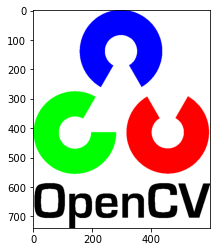

In [3]:
#read and show image
img = cv2.imread('opencv-logo.png') #img = cv2.imread('opencv-logo.png', 0) loads black and white; (1) yields default
plt.imshow(img)

In [4]:
#alternate: show image in seperate window
cv2.imshow("logo", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#save the image
cv2.imwrite('testSave.jpg',img)

In [5]:
#image info
print(type(img))
print(len(img)) #number of rows in image
print(len(img[0])) #number of columns in image
print(len(img[0][0])) #number of channels in image (RGB)
print(img.shape) #aggregate stats of image
print(img.dtype) #data type of an image
print(img.size) #total # of pixels in image

<class 'numpy.ndarray'>
739
600
3
(739, 600, 3)
uint8
1330200


In [ ]:
#we can now access our pixels using indexing and slices
print(img[10,5]) #one single pixel
print(img[:,:,0]) #one single channel

In [ ]:
plt.imshow(img[:,:,2]) #RGB, channels 0,1,2 respectively

# Data types and structures

In [ ]:
#show user created image: it's just a black square
black = np.zeros([150,200,1],'uint8') #unsigned 8 bit has max of 255, this would be white color
cv2.imshow('black', black)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(black[0,0,:]) #result of 1 pixel

In [ ]:
ones = np.zeros([150,200,3],'uint8')
cv2.imshow('ones', ones)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(ones[0,0,:])

In [ ]:
white = np.ones([150,200,3], 'uint16')
white *= (2**16-1) #multiply every pixel by max value (white is pixel array), ** means power!
cv2.imshow('white', white)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(white[0,0,:])

In [ ]:
color = ones.copy() #create a deep copy of the ones image
color[:,:] = (255,0,0) #set all pixels in image to blue (BGR format!)
cv2.imshow('blue', color)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(color[0,0,:])

#important note: we don't want to use nested for loops for processing
#rather we go for slicing and index operations always!

# Image types and color channels

In [6]:
color = cv2.imread('butterfly.jpg')
cv2.imshow('image',color)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(color.shape)
height,width,channels = color.shape #shape returns 3 elements!

(356, 493, 3)


In [7]:
b,g,r = cv2.split(color)
rgb_split = np.empty([height,width*3,3],'uint8') #we will create a frame of size 3x a single image
rgb_split[:,0:width] = cv2.merge([b,b,b]) #we put the color channels into each range: blue
rgb_split[:,width:width*2] = cv2.merge([g,g,g]) #green
rgb_split[:,width*2:width*3] = cv2.merge([r,r,r]) #red
cv2.imshow('image',rgb_split)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV) #hsv: hue, saturation, value
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)
cv2.imshow('split_hsv',hsv_split)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Pixel Manipulation and Filtering

In [11]:
color = cv2.imread('butterfly.jpg',1)
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
cv2.imwrite('gray.jpg',gray)

True

In [10]:
#adding a channel for transparency (alpha channel), this is pretty much COLOR FILTERING!
b = color[:,:,0]
g = color[:,:,1]
r = color[:,:,2]

rgba = cv2.merge((b,g,r,g)) #g will be passed in as the transparency channel: high values in the g channel not transparent
cv2.imwrite('rgba.png',rgba) #only png will retain transparency; not jpg!

#note python's native image viewer does not support transparency so you have to view image manually!

True

# Gaussian Blur, Dilation, and Erosion

In [12]:
#usually used for image preprocessing!
image = cv2.imread('thresh.jpg')
cv2.imshow('original',image)

blur = cv2.GaussianBlur(image, (5,55), 0) #blurring command
cv2.imshow('Blur',blur)

#dilation and erosion
kernel = np.ones((5,5),'uint8')
dilate = cv2.dilate(image,kernel,iterations=1) #gives more white, adding
erode = cv2.erode(image,kernel,iterations=1) #gives more black, subtracting
cv2.imshow('dilate',dilate)
cv2.imshow('erode',erode)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Scaling and Rotating Images

In [ ]:
img = cv2.imread('players.jpg',1)

#scaling
img_half = cv2.resize(img, (0,0), fx=0.5, fy=0.5) #(0,0) means not to set an absolute size; fx & fy are relative factors
img_stretch = cv2.resize(img, (600,600))
img_stretch_near = cv2.resize(img, (600,600), interpolation=cv2.INTER_NEAREST)

cv2.imshow('half',img_half)
cv2.imshow('strech',img_stretch)
cv2.imshow('near_stretch',img_stretch_near)

cv2.waitKey(0)
cv2.destroyAllWindows()

#rotation: accomplished by applying a matrix transformation
M = cv2.getRotationMatrix2D((0,0), -30, 1) #(0,0) is origin, -30 is degrees, and need value 1
rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated', rotated)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Use video inputs

In [17]:
cap = cv2.VideoCapture(0) #request the camera
while(True):
    
    ret, frame = cap.read()
    frame = cv2.resize(frame, (0,0), fx=1, fy=1)
    
    #applying the erode filter
    kernel = np.ones((3,3),'uint8')
    #erode = cv2.erode(frame,kernel,iterations=10)
    #cv2.imshow('Frame', erode)
    
    #applying dilation filter
    #dilate = cv2.dilate(erode,kernel,iterations=5) #gives more white, adding
    #cv2.imshow('Frame', dilate)
    
    #applying blur filter
    #blur = cv2.GaussianBlur(frame, (2,2), 0) #blurring command
    #cv2.imshow('Blur',blur)
    
    ch = cv2.waitKey(1) #wait key will run every 1 milisecond, so we can exit the loop
    if (ch & 0xFF == ord('q')): #q is used to quit the loop
        break
        
cap.release() #lets the camera go
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\smooth.dispatch.cpp:294: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'cv::createGaussianKernels'


# Create custom interfaces

In [18]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0) #request the camera

color = (0,255,0)
line_width = 3
radius = 100
point = (0,0)

#have a mouse click event
def click(event, x, y, flags, param):
    global point, pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        print('Pressed',x,y)
        point = (x,y)

#register click with openCV handler
cv2.namedWindow('Frame')
cv2.setMouseCallback('Frame', click)

while(True):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (0,0), fx=1, fy=1)
    cv2.circle(frame, point, radius, color, line_width)
    cv2.imshow('Frame', frame)
    
    ch = cv2.waitKey(1) #wait key will run every 1 milisecond, so we can exit the loop
    if (ch & 0xFF == ord('q')): #q is used to quit the loop
        break

cap.release() #lets the camera go
cv2.destroyAllWindows()

Pressed 247 179
Pressed 517 184
Pressed 123 166
Pressed 319 169
Pressed 321 279
Pressed 329 188
Pressed 11 87
Pressed 146 141
Pressed 354 195
Pressed 243 191
Pressed 48 310
Pressed 279 441
Pressed 592 347
Pressed 173 177
Pressed 205 277
Pressed 373 328
Pressed 287 179
Pressed 144 214
Pressed 360 320
Pressed 311 171
